Consider the Bangalore House Price Data. Perform following operations.
a) Find and replace null values in the data using appropriate technique.
b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2
c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken.
d) Calculate and add one more column as ‘Price_Per_Sqft’
e) Remove the outliers from Price_Per_Sqft and BHK Size column if any.
f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean Squared Error and Accuracy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Banglore Housing Prices.csv")

In [3]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [4]:
df.shape

(13320, 5)

In [5]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


### Find and replace null values in the data using appropriate technique.

In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2

In [9]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df['size']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


### Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken.

In [12]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df[~df['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [14]:
def catego(x):
    u=x.split('-')
    if len(u)== 2:
        return(float(u[0])+float(u[1]))/2
    try:
        return float(x)
    except:
        return None
            

In [15]:
df['total_sqft']=df['total_sqft'].apply(catego)

In [16]:
df.loc[410]

location      Kengeri
size                1
total_sqft        NaN
bath              1.0
price            18.5
Name: 410, dtype: object

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale = df['total_sqft'].values.reshape(-1, 1)

In [21]:
scaler = StandardScaler()
model = scaler.fit(scale)
scaled_data = model.transform(scale)

In [22]:
scaled_data

array([[-0.40354986],
       [ 0.84435221],
       [-0.09319079],
       ...,
       [-0.33485058],
       [ 2.53273785],
       [-0.81251258]])

### Calculate and add one more column as ‘Price_Per_Sqft’ 

In [23]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']  
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


### Remove the outliers from Price_Per_Sqft and BHK Size column if any.

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='size'>

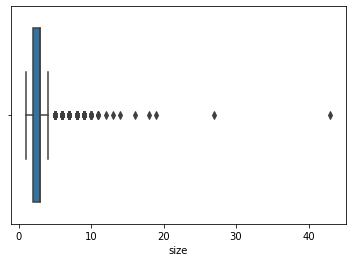

In [25]:
sns.boxplot(x=df['size'])

In [26]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_iqr(df['size'])
print("Outliers from IQR method: ", marks_outliers)

Outliers from IQR method:  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [27]:
Q1=df['size'].quantile(0.25)
Q3=df['size'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.0
3.0
1.0
0.5 4.5


In [28]:
df = df[(df['size'] >= Lower_Whisker) & (df['size'] <= Upper_Whisker)]

<AxesSubplot:xlabel='price_per_sqft'>

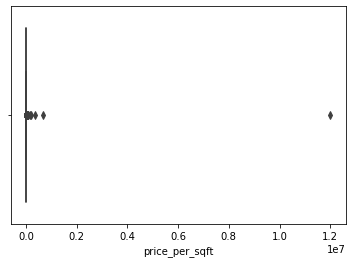

In [29]:
sns.boxplot(x=df['price_per_sqft'])

In [30]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
marks_outliers = detect_outliers_iqr(df['price_per_sqft'])
print("Outliers from IQR method: ", marks_outliers)

Outliers from IQR method:  [11085.180863477246, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11111.111111111111, 11120.0, 11126.760563380281, 11145.165784341041, 11146.598530820824, 11153.846153846154, 11160.714285714286, 11162.179908076165, 11162.790697674418, 11162.790697674418, 11166.666666666666, 11171.574903969271, 11176.470588235294, 11200.0, 11200.0, 11206.896551724138, 11206.896551724138, 11206.896551724138, 11235.955056179775, 11247.80316344464, 11247.80316344464, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11250.0, 11266.666666666666, 11272.727272727272, 11285.714285714286, 11290.322580645161, 11308.562197092084, 11313.131313131313, 11314.186248912098, 11326.860841423948, 11333.333333333334, 11333.333333333334, 11333.333333333334, 11333.333333333334, 11333.333333333334, 11336.032388663967, 11337.209302325582, 11347.51

In [31]:
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

4223.60248447205
6958.52534562212
2734.9228611500703
121.21819274694371 11060.909637347226


In [32]:
df = df[(df['price_per_sqft'] >= Lower_Whisker) & (df['price_per_sqft'] <= Upper_Whisker)]

In [33]:
df.describe()

,size,total_sqft,bath,price,price_per_sqft
count,11347.000000,11347.000000,11347.000000,11347.000000,11347.000000
mean,2.501278,1461.435790,2.397109,82.658812,5436.421221
std,0.720181,1051.204649,0.818579,63.941723,1782.233439
min,1.000000,276.000000,1.000000,8.000000,267.829813
25%,2.000000,1100.000000,2.000000,47.000000,4132.221472
50%,2.000000,1260.000000,2.000000,65.000000,5114.503817
75%,3.000000,1600.000000,3.000000,95.000000,6439.209165
max,4.000000,52272.000000,8.000000,2100.000000,11041.207927


### Linear Regression

In [34]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'price_per_sqft'], dtype='object')

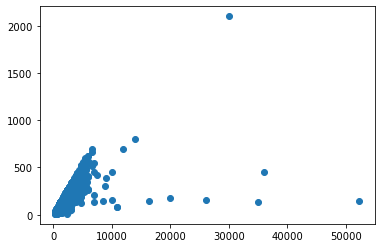

In [35]:
plt.scatter(df['total_sqft'], df['price'])

In [36]:
x=df['price']
y=df['total_sqft']

In [37]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
# This method returns key values of Linear Regression

In [38]:
def Linearfunc(x):
      return slope * x + intercept

mymodel = list(map(Linearfunc, x))


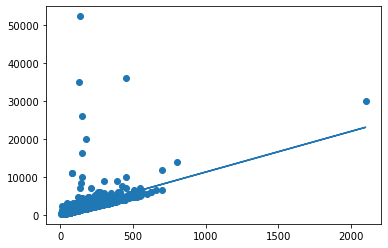

In [39]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [40]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['location', 'price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the prices on training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate Mean Squared Error on training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Accuracy on training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the performance measures
print("Training set Mean Squared Error: {:.2f}".format(mse_train))
print("Testing set Mean Squared Error: {:.2f}".format(mse_test))
print("Training set Accuracy: {:.2f}".format(r2_train))
print("Testing set Accuracy: {:.2f}".format(r2_test))

Training set Mean Squared Error: 825.62
Testing set Mean Squared Error: 1444.78
Training set Accuracy: 0.78
Testing set Accuracy: 0.74


In [41]:
lr.coef_

array([4.72446610e+00, 2.29143796e-02, 1.98256681e+01, 1.68110578e-02])

In [42]:
lr.intercept_

-101.64654522608849

In [43]:
lr.predict([[2,1056,2.0,3699.8106]])

C:\Users\meenu\anaconda32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.84903814])